# **Importing Packages**

Make sure to install the packages before importing if needed.

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import igraph
import leidenalg

# **Loading Data**

https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md 
requirements for all AnnData objects CELLxCELL

In [2]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/AD_PD_CTRL.h5ad")

## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/21000_AD_PD_CTRL.h5ad/21000_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

In [3]:
adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_85222/2862628901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


disease                        AD_status      Parkinson_disease
dementia || Alzheimer disease  No             No                       0
                                              Yes                      0
                               Not Evaluated  No                       0
                                              Yes                      0
                               Yes            No                   78241
                                              Yes                      0
dementia || Parkinson disease  No             No                       0
                                              Yes                   7772
                               Not Evaluated  No                       0
                                              Yes                      0
                               Yes            No                       0
                                              Yes                      0
normal                         No             No            

## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [4]:
adata

AnnData object with n_obs × n_vars = 128932 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sch

In [5]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

adata.X[:5, :5]

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 4 stored elements and shape (5, 5)>

In [6]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (128932, 34176).
There are 128932 cells and 34176 genes in this dataset.


In [7]:
adata.obs.shape
import pandas as pd
x=pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
x

disease     dementia || Alzheimer disease  dementia || Parkinson disease  \
donor_id                                                                   
Donor_31                             3573                              0   
Donor_82                             2388                              0   
Donor_137                            5495                              0   
Donor_228                            1509                              0   
Donor_310                            7877                              0   
Donor_333                            5017                              0   
Donor_478                               0                              0   
Donor_540                            5246                              0   
Donor_545                               0                           1942   
Donor_601                               0                              0   
Donor_609                               0                              0   
Donor_614                            3275                              0   
Donor_616                            7594                              0   
Donor_634                               0                              0   
Donor_638                            2390                              0   
Donor_721                               0                              0   
Donor_730                            4496                              0   
Donor_735                               0                              0   
Donor_785                            5449                              0   
Donor_865                            7282                              0   
Donor_917                            5217                              0   
Donor_941                               0                           5029   
Donor_972                            2530                              0   
Donor_1001                           8324                              0   
Donor_1003                              0                              0   
Donor_1007                            579                              0   
Donor_1146                              0                              0   
Donor_1278                              0                              0   
Donor_1467                              0                            801   

disease     normal  
donor_id            
Donor_31         0  
Donor_82         0  
Donor_137        0  
Donor_228        0  
Donor_310        0  
Donor_333        0  
Donor_478     2608  
Donor_540        0  
Donor_545        0  
Donor_601     1636  
Donor_609     7326  
Donor_614        0  
Donor_616        0  
Donor_634     5343  
Donor_638        0  
Donor_721     7933  
Donor_730        0  
Donor_735     5143  
Donor_785        0  
Donor_865        0  
Donor_917        0  
Donor_941        0  
Donor_972        0  
Donor_1001       0  
Donor_1003    1344  
Donor_1007       0  
Donor_1146    8018  
Donor_1278    3568  
Donor_1467       0

In [8]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts   class    subclass  \
barcodekey                                                                     
Donor_917-2-GTCCACTTCAACACCA-1      R     5615   20297.0      EN  EN_L2_3_IT   
Donor_972-2-CATCCGTTCACCTTGC-1      R     3127    6572.0   Oligo       Oligo   
Donor_82-2-ATCCCTGGTATCTTCT-0       R     2173    3458.0  Immune       Micro   
Donor_310-2-TAGATCGGTTAGTCGT-1      R     6404   21566.0      IN      IN_SST   
Donor_865-2-GAAGCGAAGTTGGGAC-1      R     5055   14487.0      IN      IN_VIP   

                                         subtype tissue_ontology_term_id  \
barcodekey                                                                 
Donor_917-2-GTCCACTTCAACACCA-1  EN_L2_3_IT_PDGFD          UBERON:0009834   
Donor_972-2-CATCCGTTCACCTTGC-1      Oligo_OPALIN          UBERON:0009834   
Donor_82-2-ATCCCTGGTATCTTCT-0              Micro          UBERON:0009834   
Donor_310-2-TAGATCGGTTAGTCGT-1      IN_SST_EDNRA          UBERON:0009834   
Donor_865-2-GAAGCGAAGTTGGGAC-1      IN_VIP_TRPC6          UBERON:0009834   

                               tissue_type assay_ontology_term_id  \
barcodekey                                                          
Donor_917-2-GTCCACTTCAACACCA-1      tissue            EFO:0009922   
Donor_972-2-CATCCGTTCACCTTGC-1      tissue            EFO:0009922   
Donor_82-2-ATCCCTGGTATCTTCT-0       tissue            EFO:0009922   
Donor_310-2-TAGATCGGTTAGTCGT-1      tissue            EFO:0009922   
Donor_865-2-GAAGCGAAGTTGGGAC-1      tissue            EFO:0009922   

                               cell_type_ontology_term_id  ...  \
barcodekey                                                 ...   
Donor_917-2-GTCCACTTCAACACCA-1                 CL:4030059  ...   
Donor_972-2-CATCCGTTCACCTTGC-1                 CL:0000128  ...   
Donor_82-2-ATCCCTGGTATCTTCT-0                  CL:0000129  ...   
Donor_310-2-TAGATCGGTTAGTCGT-1                 CL:4023017  ...   
Donor_865-2-GAAGCGAAGTTGGGAC-1                 CL:4023016  ...   

                               genetic_ancestry  \
barcodekey                                        
Donor_917-2-GTCCACTTCAACACCA-1          unknown   
Donor_972-2-CATCCGTTCACCTTGC-1          unknown   
Donor_82-2-ATCCCTGGTATCTTCT-0           unknown   
Donor_310-2-TAGATCGGTTAGTCGT-1          unknown   
Donor_865-2-GAAGCGAAGTTGGGAC-1       East Asian   

                                      disease_ontology_term_id  \
barcodekey                                                       
Donor_917-2-GTCCACTTCAACACCA-1  MONDO:0001627 || MONDO:0004975   
Donor_972-2-CATCCGTTCACCTTGC-1  MONDO:0001627 || MONDO:0004975   
Donor_82-2-ATCCCTGGTATCTTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_310-2-TAGATCGGTTAGTCGT-1  MONDO:0001627 || MONDO:0004975   
Donor_865-2-GAAGCGAAGTTGGGAC-1  MONDO:0001627 || MONDO:0004975   

                                                                        cell_type  \
barcodekey                                                                          
Donor_917-2-GTCCACTTCAACACCA-1  L2/3 intratelencephalic projecting glutamaterg...   
Donor_972-2-CATCCGTTCACCTTGC-1                                    oligodendrocyte   
Donor_82-2-ATCCCTGGTATCTTCT-0                                     microglial cell   
Donor_310-2-TAGATCGGTTAGTCGT-1                 sst GABAergic cortical interneuron   
Donor_865-2-GAAGCGAAGTTGGGAC-1                 VIP GABAergic cortical interneuron   

                                    assay                        disease  \
barcodekey                                                                 
Donor_917-2-GTCCACTTCAACACCA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_972-2-CATCCGTTCACCTTGC-1  10x 3' v3  dementia || Alzheimer disease   
Donor_82-2-ATCCCTGGTATCTTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_310-2-TAGATCGGTTAGTCGT-1  10x 3' v3  dementia || Alzheimer disease   
Donor_865-2-GAAGCGAAGTTGGGAC-1  10x 3' v3  dementia || Alzheimer disease   

                                   sex  

In [9]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names)

Donor Names : 
 Index(['Donor_917-2-GTCCACTTCAACACCA-1', 'Donor_972-2-CATCCGTTCACCTTGC-1',
       'Donor_82-2-ATCCCTGGTATCTTCT-0', 'Donor_310-2-TAGATCGGTTAGTCGT-1',
       'Donor_865-2-GAAGCGAAGTTGGGAC-1', 'Donor_31-1-TGCAGATTCCACCTGT-0',
       'Donor_865-2-TCATCATAGGTACATA-1', 'Donor_865-1-TGACCCTTCCTTGAAG-0',
       'Donor_540-1-GCCAGCACACGTGTGC-0', 'Donor_137-1-TAACACGCATGACGAG-0',
       ...
       'Donor_609-1-TCATGCCAGTGGTTCT-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_634-2-ACTCCCAGTGGATACG-0', 'Donor_721-1-CCGAACGAGGCATTTC-0',
       'Donor_609-2-TGGGCTGAGTACGTCT-1', 'Donor_735-1-GGTTCTCGTCTTCTAT-0',
       'Donor_735-2-CAACCTCCAACGATTC-1', 'Donor_721-1-CTGTATTTCTTCTCAA-0',
       'Donor_735-1-AACACACAGCACGTCC-0', 'Donor_735-2-GCAACATAGCGTACAG-1'],
      dtype='object', name='barcodekey', length=128932)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971',

In [10]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [11]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"]==disease_type]), " cells :", disease_type)

78241  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
42919  cells : normal


In [12]:
# métadonnées gènes 
print("adata.var.keys :", adata.var.keys())

adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   

                   feature_type  
ENSG00000000003  protein_coding  
ENSG00000000005  protein_coding

#### **Embeddings**
To compare with our results

In [13]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


In [14]:
adata.obs.keys()

Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')

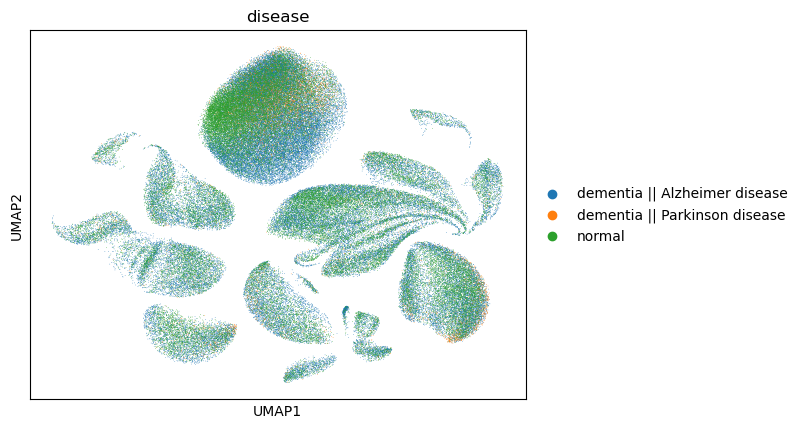

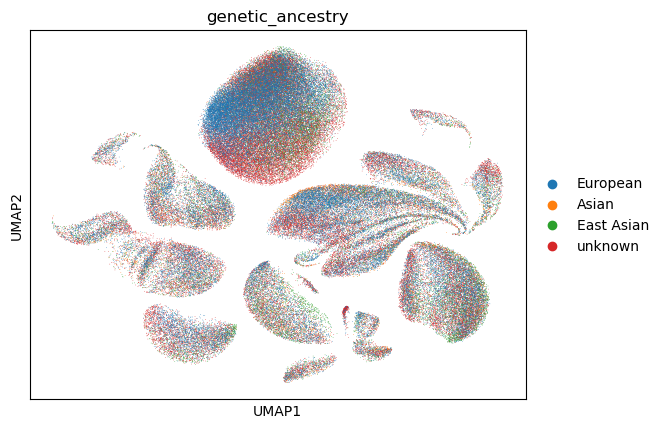

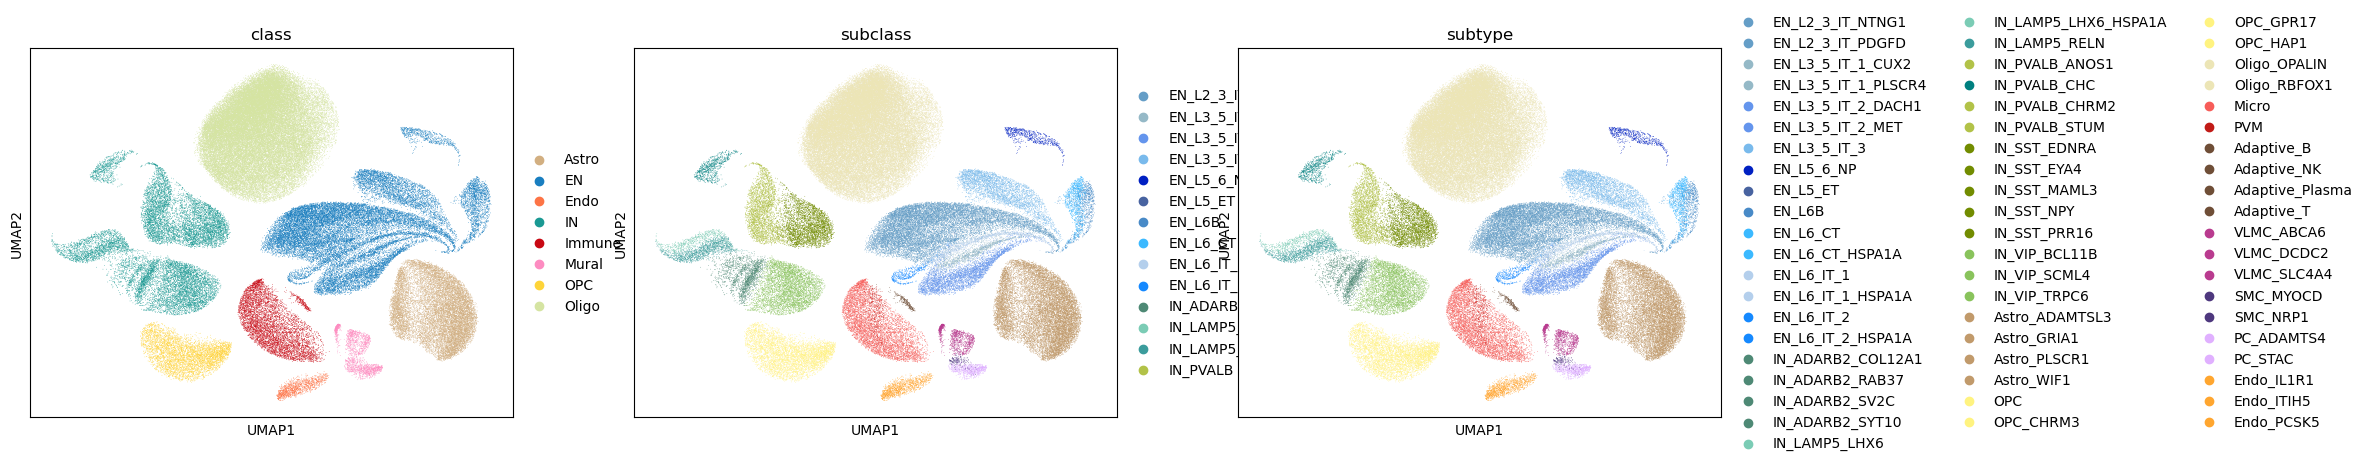

In [15]:
# sc.pl.umap(adata, color='cell_type')
sc.pl.umap(adata, color='disease')
sc.pl.umap(adata, color='genetic_ancestry')

# sc.pl.umap(adata, color='AD_status')
# sc.pl.umap(adata, color='sex')
# sc.pl.umap(adata, color='subclass')
# sc.pl.umap(adata, color=['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

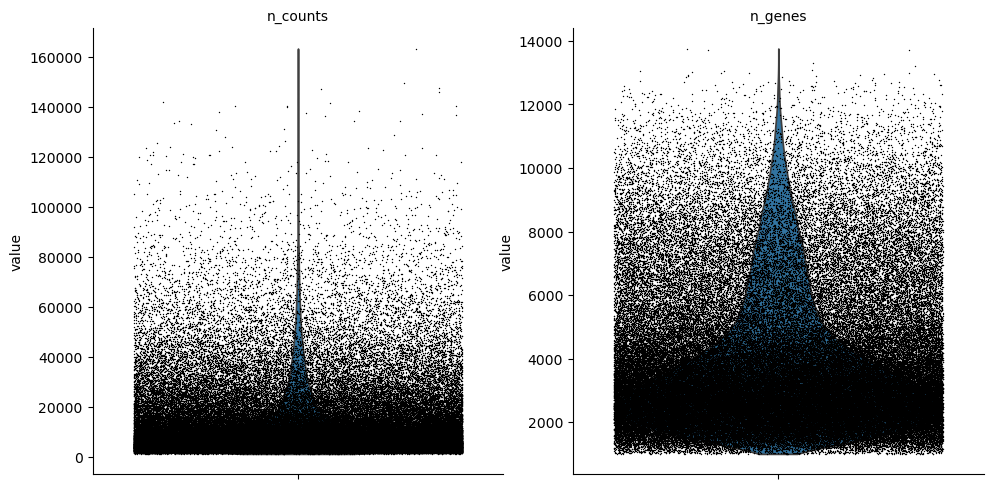

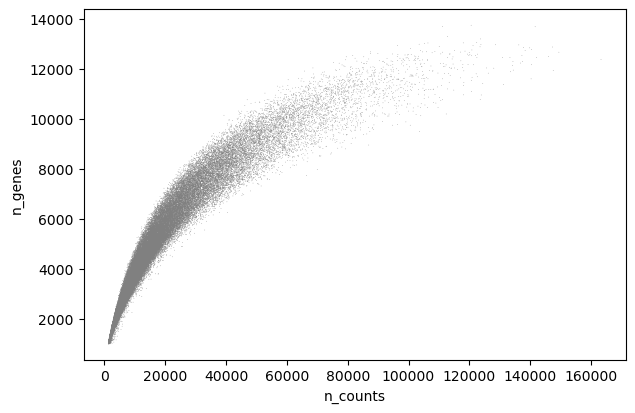

In [16]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x='n_counts', y='n_genes') # Scatter plot of number of genes vs number of counts

### b - Filtering out low quality cells

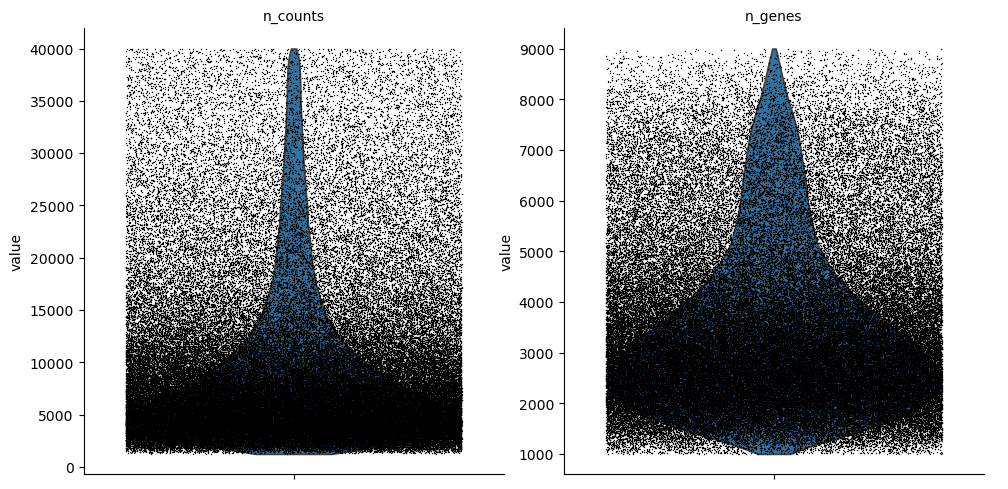

In [ ]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 10000, :] # cutoff chosen: 9 000 genes

adata = adata[adata.obs['n_counts'] < 60000, :] # cutoff chosen: 40 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)



### c - Filtering out mitochondrial genes

In [18]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p=True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_85222/3540220753.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


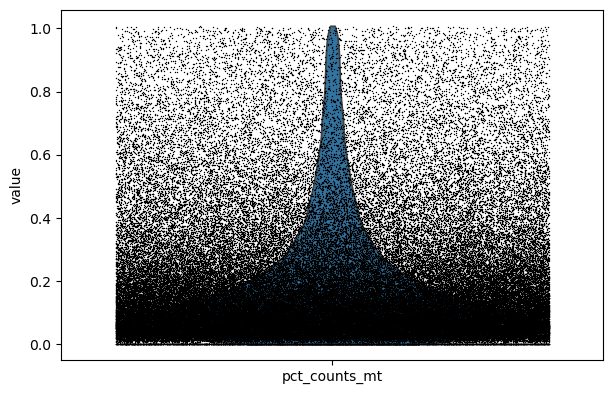

In [19]:
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter=0.4,
    rotation=0,   
    stripplot=True,
    show=True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


### d - Excluding ribosomic and hemoglobin genes

In [ ]:
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes :  9
Number of hemo genes :  0


## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34176 genes


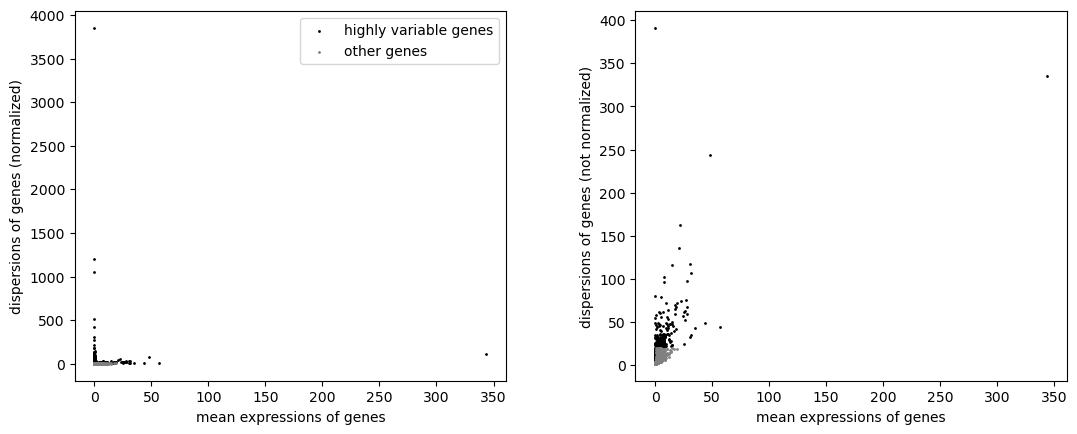

In [ ]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

alternative aux HVG : prendre les 3000 gènes les + exprimés

In [25]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31176
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [30]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [31]:
# Scaling 
sc.pp.scale(adata_hvg, max_value = 10)


/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


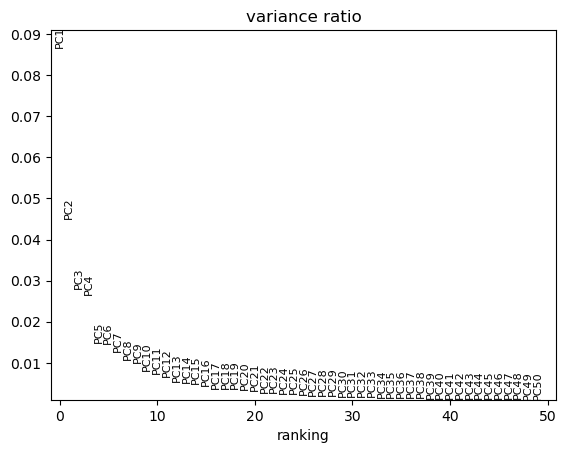

In [ ]:
# PCA
sc.tl.pca(adata_hvg)

sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

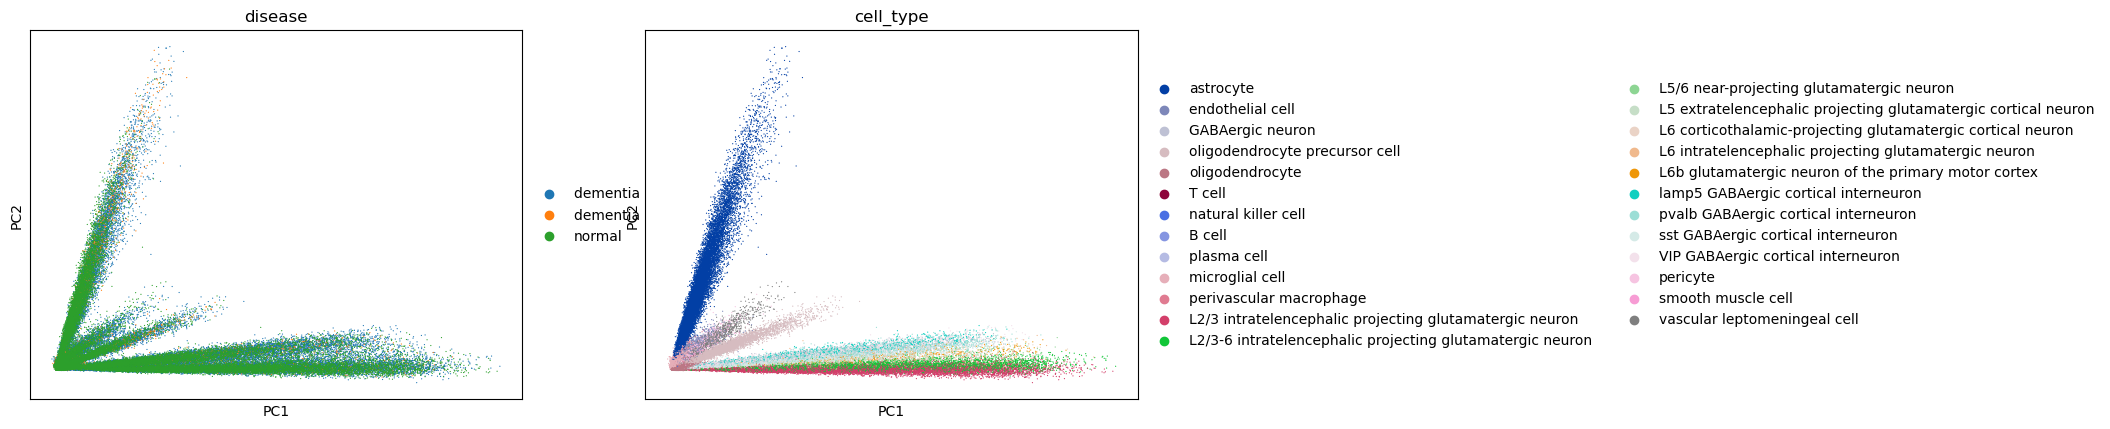

In [33]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "cell_type"],
    ncols = 3,
    size = 3,
)

## Batch effect correction??

In [47]:
import bbknn
bbknn.bbknn(adata_hvg, batch_key='donor_id')

## 5. Clustering

### Neighbors

In [48]:
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(adata_hvg, n_pcs = nPC)

### Clustering

In [49]:
import igraph
import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.0007)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

Number of clusters : 8


### UMAP

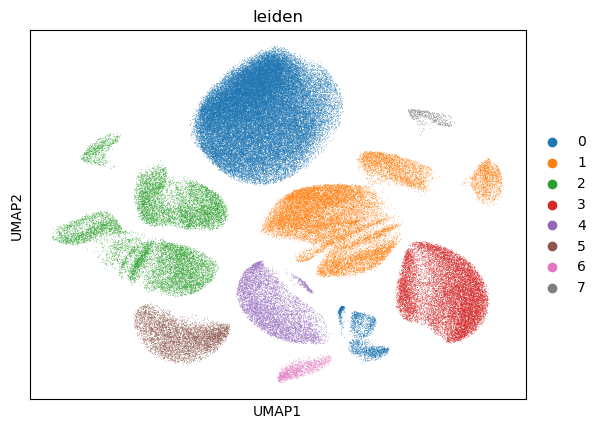

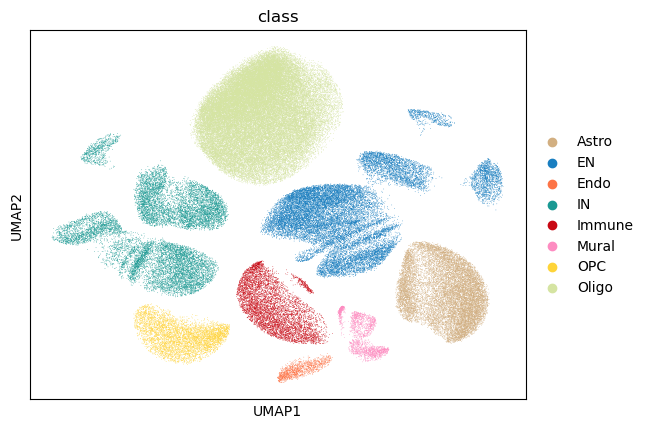

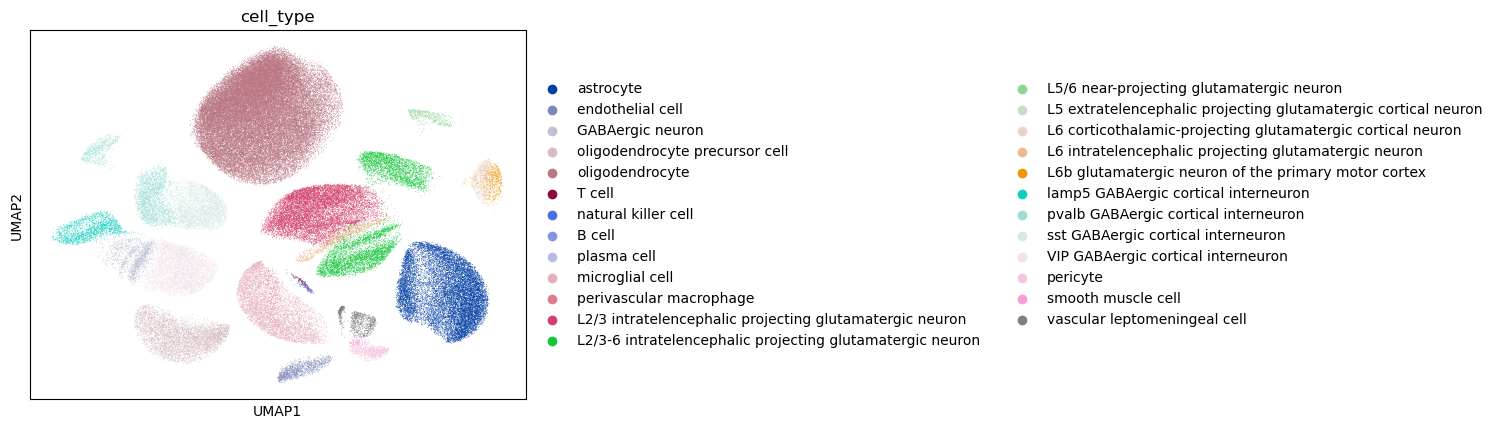

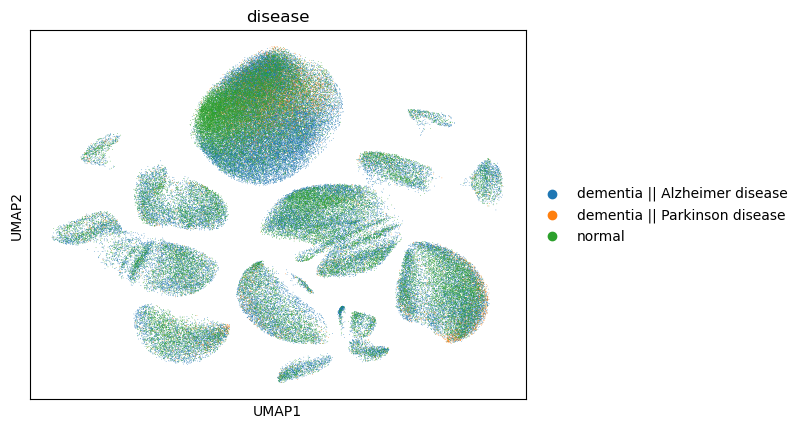

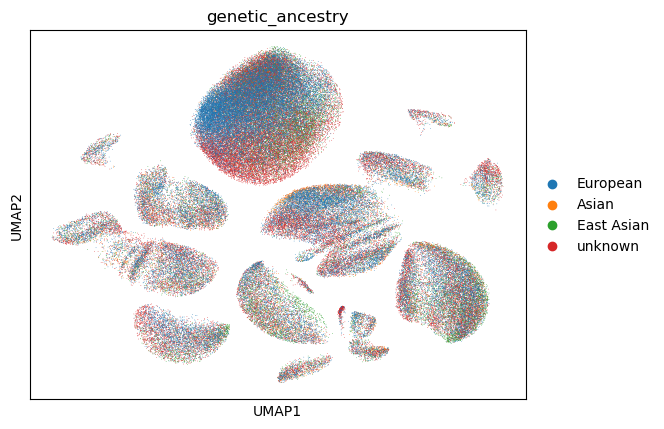

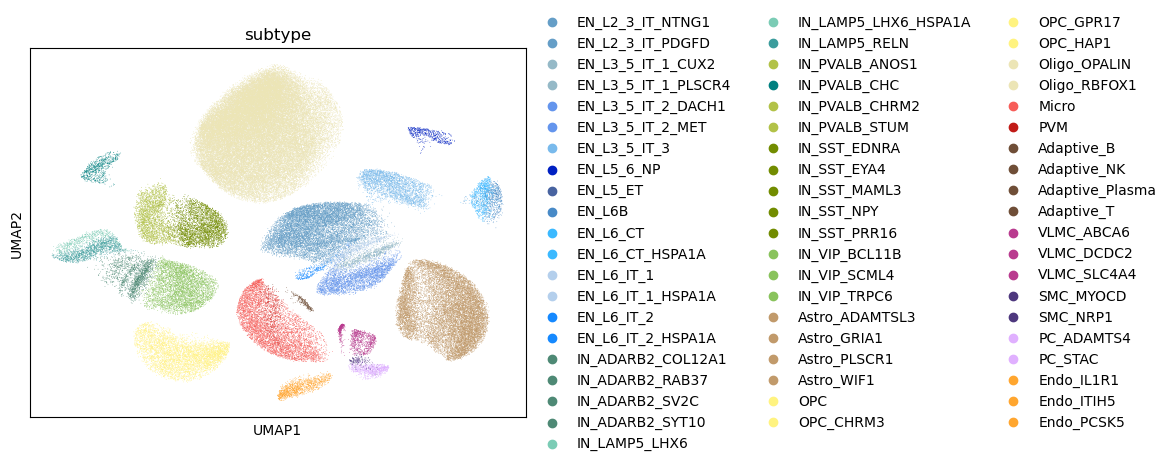

In [51]:
# UMAP

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

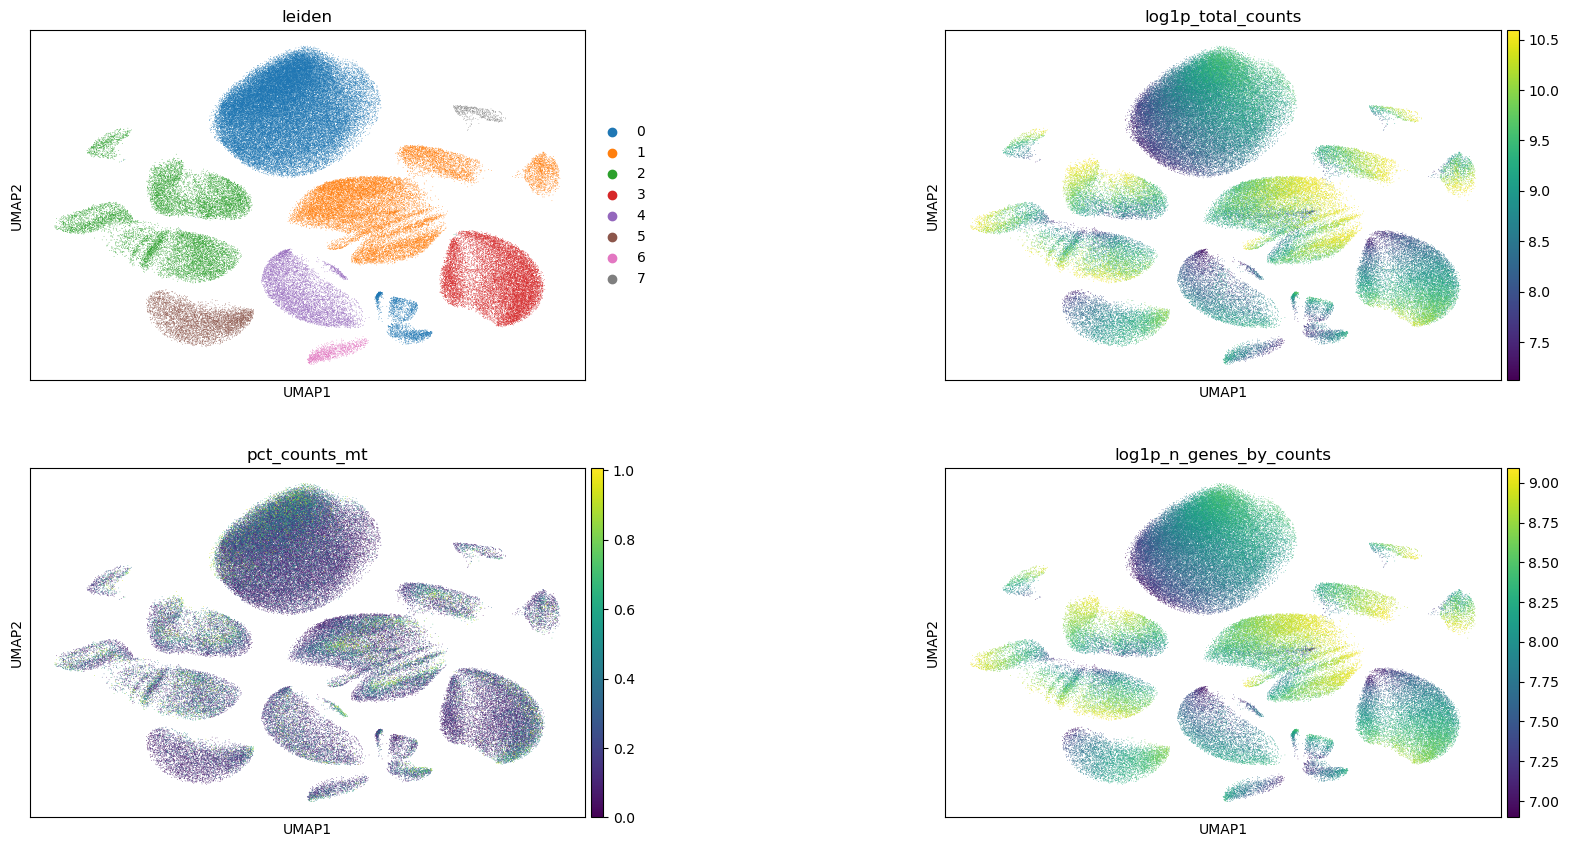

In [42]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## **6. Differential Gene Expression**

In [ ]:
cluster = "0"

adata_cluster = adata_hvg[adata_hvg.obs["leiden"] == cluster]

In [ ]:
sc.tl.rank_genes_groups(
    adata_cluster,
    groupby = "disease",
    groups = ["dementia || Alzheimer disease"],
    reference = "normal",
    method = "wilcoxon"
)

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:669: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


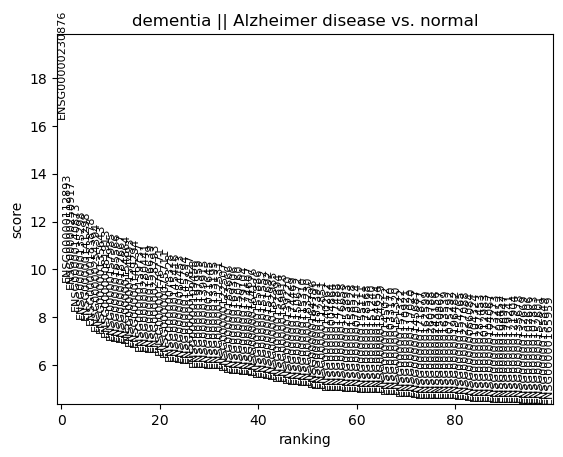

In [ ]:
sc.pl.rank_genes_groups(adata_cluster, n_genes=100)